### Dados fictícios de vendas de comércio eletrônico

#### Visualizando o comércio: a arte dos dados na análise de comércio eletrônico

##### Descrição
##### Este conjunto de dados, intitulado 'Dados fictícios de vendas de comércio eletrônico', consiste em 10.000 linhas de dados de vendas simuladas para um pequeno site de comércio eletrônico. 
##### Ele foi gerado usando técnicas de geração de dados sintéticos e não contém nenhuma informação real do usuário.

##### Campos no conjunto de dados

##### ID do pedido : um identificador exclusivo para cada pedido.
##### ID do produto : um identificador exclusivo para cada produto.
##### Categoria do produto : a categoria à qual o produto pertence.
##### Quantidade : O número de produtos encomendados.
##### Preço Unitário : Preço por unidade do produto.
##### Preço Total : Preço total do(s) produto(s) do pedido (Quantidade x Preço Unitário).
##### Data do pedido : A data em que o pedido foi feito.
##### ID do cliente : um identificador exclusivo para cada cliente.
##### Tipo de pagamento : forma de pagamento (por exemplo, cartão de crédito, PayPal, etc.).
##### Status do pedido : Status do pedido (por exemplo, Concluído, Pendente, Cancelado).

##### Os dados estão disponíveis em: https://www.kaggle.com/datasets/hassaneskikri/fictional-e-commerce-sales-data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
# Carregando os dados do arquivo

caminho_arquivo = 'larger_sales_dataset.csv'
dados = pd.read_csv(caminho_arquivo)

In [3]:
# Verificando as primeiras linhas

print("Primeiras linhas do DataFrame")
print(dados.head())

Primeiras linhas do DataFrame
                               Order ID                            Product ID  \
0  873ff350-854d-4bd8-aebf-6cc5e1a6d3b7  26ab320e-62f2-4203-be68-f8740085d796   
1  7cb2641e-ea6b-4faf-a7ab-24992d5573fa  8c0d7ba9-1e6b-412a-8359-97d964ad19e5   
2  94e0de8a-419d-46e1-9e7c-65c730b89c65  5d65b6c7-1894-4207-b7e3-b53cc2d5e5e3   
3  88cc8ccf-f018-46ac-ba3b-f36b5cf4e429  b3f6c6a5-d3cb-49a4-b53b-3996be815c28   
4  eb520575-720e-456e-9dc5-c2c3bb887bfc  fed52dbf-49c6-4128-8b18-c36e50184a04   

    Product Category  Quantity  Unit Price  Total Price  Order Date  \
0  Sports & Outdoors         4  154.050509   616.202036  2023-08-02   
1     Home & Kitchen         5  275.539908  1377.699538  2023-09-03   
2    Beauty & Health         3   56.410098   169.230294  2023-12-06   
3              Books         2  176.410906   352.821812  2023-07-22   
4        Electronics         3  409.892144  1229.676431  2023-04-08   

                            Customer ID Payment Type Ord

In [4]:
# Verificando os tipos de dados presentes

print("\nTipos de dados nas colunas")
print(dados.dtypes)


Tipos de dados nas colunas
Order ID             object
Product ID           object
Product Category     object
Quantity              int64
Unit Price          float64
Total Price         float64
Order Date           object
Customer ID          object
Payment Type         object
Order Status         object
dtype: object


In [5]:
# Verificando dados ausentes

dados_ausentes = dados.isnull().sum()
print("\nDados ausentes nas colunas")
print(dados_ausentes)


Dados ausentes nas colunas
Order ID            0
Product ID          0
Product Category    0
Quantity            0
Unit Price          0
Total Price         0
Order Date          0
Customer ID         0
Payment Type        0
Order Status        0
dtype: int64


#### Normalizando dados

In [6]:
# Realizando a tradução das colunas

traducao = {
    "Order ID": "ID do Pedido",
    "Product ID": "ID do Produto",
    "Product Category": "Categoria do Produto",
    "Quantity": "Quantidade",
    "Unit Price": "Preço Unitário",
    "Total Price": "Preço Total",
    "Order Date": "Data do Pedido",
    "Customer ID": "ID do Cliente",
    "Payment Type": "Tipo de Pagamento",
    "Order Status": "Status do Pedido"
}

# Renomeando as colunas usando o mapeamento de tradução
dados = dados.rename(columns=traducao)

# Exibindo os nomes das colunas traduzidos
print(dados.columns)

Index(['ID do Pedido', 'ID do Produto', 'Categoria do Produto', 'Quantidade',
       'Preço Unitário', 'Preço Total', 'Data do Pedido', 'ID do Cliente',
       'Tipo de Pagamento', 'Status do Pedido'],
      dtype='object')


In [7]:
# Realizando a tradução dos dados contidos nas colunas 'Categoria do Produto', 'Tipo de Pagamento' e 'Status do Pedido'

categoria_traducao = {
    'Beauty & Health': 'Beleza e Saúde',
    'Books': 'Livros',
    'Clothing': 'Vestuário',
    'Electronics': 'Eletrônicos',
    'Home & Kitchen': 'Casa e Cozinha',
    'Sports & Outdoors': 'Esportes e Ar Livre'
}

In [8]:
pagamento_traducao = {
    'Credit Card': 'Cartão de Crédito',
    'Debit Card': 'Cartão de Débito',
    'Gift Card': 'Cartão Presente',
    'PayPal': 'PayPal'
}

In [9]:
status_traducao = {
    'Cancelled': 'Cancelado',
    'Completed': 'Concluído',
    'Pending': 'Pendente',
    'Refunded': 'Reembolsado'
}

In [10]:
# Aplicando a tradução aos dados

dados['Categoria do Produto'] = dados['Categoria do Produto'].map(categoria_traducao)
dados['Tipo de Pagamento'] = dados['Tipo de Pagamento'].map(pagamento_traducao)
dados['Status do Pedido'] = dados['Status do Pedido'].map(status_traducao)

In [11]:
# Verificando a consistência dos dados da coluna 'Data do Pedido'e realizando a conversão de tipo

dados['Data do Pedido'] = pd.to_datetime(dados['Data do Pedido'], errors = 'coerce')

In [12]:
# Arredondando as colunas 'Preço Unitário' e 'Preço Total' para duas casas decimais

dados['Preço Unitário'] = dados['Preço Unitário'].round(2)
dados['Preço Total'] = dados['Preço Total'].round(2)

In [13]:
# Criar um dicionário para mapear o número do mês para o nome do mês

meses = {
    1: 'Janeiro',
    2: 'Fevereiro',
    3: 'Março',
    4: 'Abril',
    5: 'Maio',
    6: 'Junho',
    7: 'Julho',
    8: 'Agosto',
    9: 'Setembro',
    10: 'Outubro',
    11: 'Novembro',
    12: 'Dezembro'
}

In [14]:
# Extrair o mês da coluna 'Data do Pedido'

dados['Mês'] = dados['Data do Pedido'].dt.month

In [15]:
# Criar uma nova coluna 'Nome do Mês' com o nome do mês correspondente ao número do mês

dados['Nome do Mês'] = dados['Mês'].map(meses)

In [16]:
# Exibindo as primeiras linhas do DataFrame para verificar as alterações

print(dados.head())

                           ID do Pedido                         ID do Produto  \
0  873ff350-854d-4bd8-aebf-6cc5e1a6d3b7  26ab320e-62f2-4203-be68-f8740085d796   
1  7cb2641e-ea6b-4faf-a7ab-24992d5573fa  8c0d7ba9-1e6b-412a-8359-97d964ad19e5   
2  94e0de8a-419d-46e1-9e7c-65c730b89c65  5d65b6c7-1894-4207-b7e3-b53cc2d5e5e3   
3  88cc8ccf-f018-46ac-ba3b-f36b5cf4e429  b3f6c6a5-d3cb-49a4-b53b-3996be815c28   
4  eb520575-720e-456e-9dc5-c2c3bb887bfc  fed52dbf-49c6-4128-8b18-c36e50184a04   

  Categoria do Produto  Quantidade  Preço Unitário  Preço Total  \
0  Esportes e Ar Livre           4          154.05       616.20   
1       Casa e Cozinha           5          275.54      1377.70   
2       Beleza e Saúde           3           56.41       169.23   
3               Livros           2          176.41       352.82   
4          Eletrônicos           3          409.89      1229.68   

  Data do Pedido                         ID do Cliente  Tipo de Pagamento  \
0     2023-08-02  292fe8cf-4d60-4

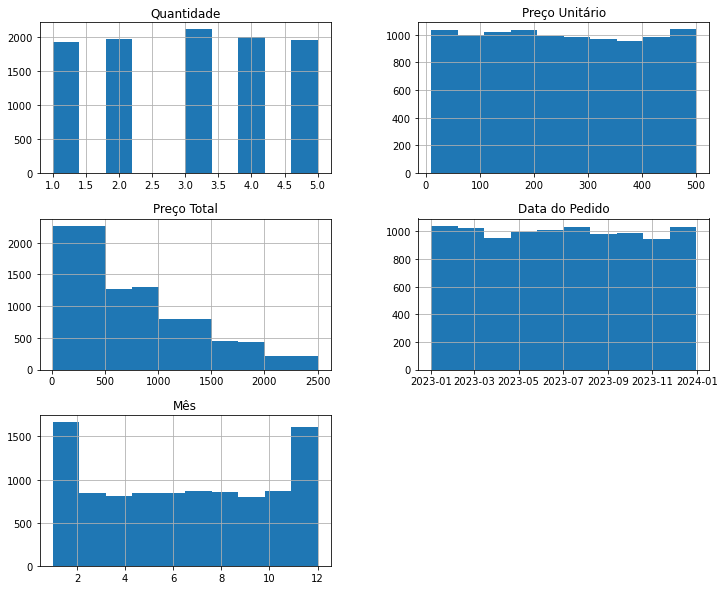

In [17]:
# Analisando distribuições das variáveis

distribuicoes_numericas = dados.hist(figsize = (12, 10))

### Primeiras impressões dos dados

##### Primeiro conhecir os dados visualizando as primeiras linhas do arquivo.
##### Realizei uma verificação da coluna 'Order Date' com a finalidade de converter os dados para o formato datatime.
##### Realizei a verificação de dados ausente e fiquei bastante surpreso por não haver dados ausentes no conjunto.

##### Realizei a verificação das variáveis númericas. Analisando os gráficos, percebo o seguinte:

##### Quantity: Este gráfico nos mostra a distribuição da quantidade de produtos encomendados. O gráfico de quantidade mostra que a maioria das encomendas possui quantidades menores de produtos. No entanto, há alguns pedidos com quantidades maiores, o que pode indicar compras em grande quantidade por alguns clientes ou promoções específicas.

##### Unit Price: Aqui, podemos visualizar como os preços unitários dos produtos estão distribuídos. A distribuição de preços unitários parece ser bastante variada, com alguns produtos mais caros e outros mais baratos. Isso sugere uma diversidade de produtos em termos de preço.

##### Total Price: Esse gráfico nos mostra a distribuição do preço total dos pedidos. O gráfico de preço total dos pedidos mostra uma distribuição que se concentra em valores mais baixos, o que é esperado, considerando que a maioria das encomendas possui quantidades menores de produtos. No entanto, também há alguns pedidos com preços totais significativamente mais altos, possivelmente devido a compras maiores ou produtos mais caros.

##### Order Date: Este gráfico pode representar a distribuição temporal das vendas.O gráfico de data de pedido mostra como as vendas estão distribuídas ao longo do tempo. Podemos observar se há sazonalidade nas vendas, tendências de aumento ou diminuição ao longo do tempo, ou se as vendas se mantêm estáveis.

#### Análise de tendências temporais

In [18]:
# Filtrando apenas as vendas canceladas

vendas_canceladas = dados[dados['Status do Pedido'] == 'Cancelado']

# Extraindo o mês da coluna 'Data do Pedido'

dados['Mês'] = dados['Data do Pedido'].dt.month

# Agrupando os dados pela coluna mês e calculando a soma total de vendas canceladas para cada mês

vendas_por_mes_canceladas = vendas_canceladas.groupby('Mês')['Preço Total'].sum()

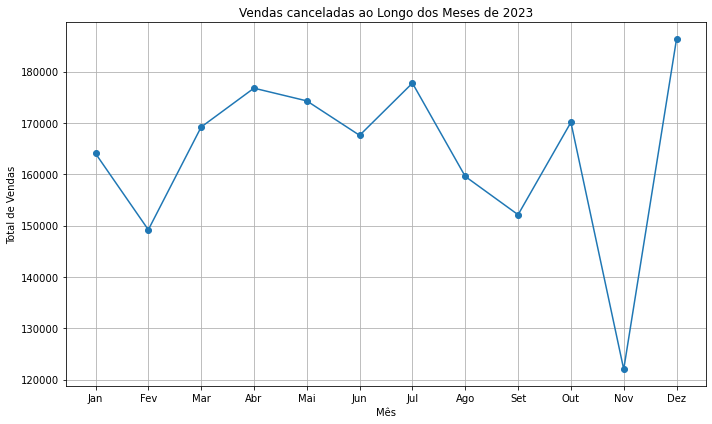

In [19]:
# Gerando um gráfico de linha para visualizar a variação das vendas canceladas ao longo dos meses

plt.figure(figsize = (10, 6))
plt.plot(vendas_por_mes_canceladas.index, vendas_por_mes_canceladas.values, marker='o', linestyle = '-')
plt.title('Vendas canceladas ao Longo dos Meses de 2023')
plt.xlabel('Mês')
plt.ylabel('Total de Vendas')
plt.grid(True)
plt.xticks(range(1, 13), ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'])
plt.tight_layout()
plt.show()

In [20]:
# Filtrando apenas as vendas concluídas

vendas_concluidas = dados[dados['Status do Pedido'] == 'Concluído']

# Extraindo o mês da coluna 'Data do Pedido'

dados['Mês'] = dados['Data do Pedido'].dt.month

# Agrupando os dados pela coluna mês e calculando a soma total de vendas concluídas para cada mês

vendas_por_mes_concluidas = vendas_concluidas.groupby('Mês')['Preço Total'].sum()

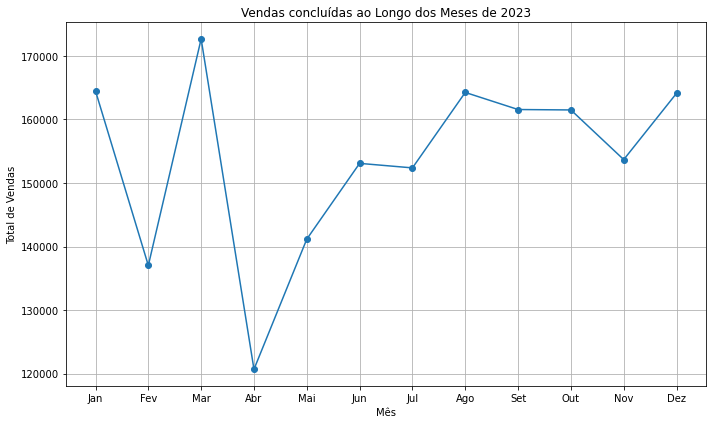

In [21]:
# Gerando um gráfico de linha para visualizar a variação das vendas concluídas ao longo dos meses

plt.figure(figsize = (10, 6))
plt.plot(vendas_por_mes_concluidas.index, vendas_por_mes_concluidas.values, marker='o', linestyle = '-')
plt.title('Vendas concluídas ao Longo dos Meses de 2023')
plt.xlabel('Mês')
plt.ylabel('Total de Vendas')
plt.grid(True)
plt.xticks(range(1, 13), ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'])
plt.tight_layout()
plt.show()

In [22]:
# Filtrando apenas as vendas pendentes

vendas_por_mes_pendentes = dados[dados['Status do Pedido'] == 'Reembolsado']

# Extraindo o mês da coluna 'Data do Pedido'

dados['Mês'] = dados['Data do Pedido'].dt.month

# Agrupando os dados pela coluna mês e calculando a soma total de vendas reembolsadas para cada mês

vendas_por_mes_pendentes = vendas_por_mes_pendentes.groupby('Mês')['Preço Total'].sum()

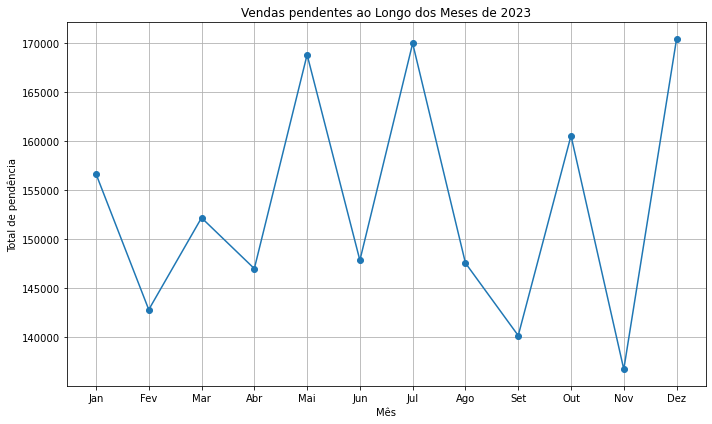

In [23]:
# Gerando um gráfico de linha para visualizar a variação das vendas pendentes ao longo dos meses

plt.figure(figsize = (10, 6))
plt.plot(vendas_por_mes_pendentes.index, vendas_por_mes_pendentes.values, marker='o', linestyle = '-')
plt.title('Vendas pendentes ao Longo dos Meses de 2023')
plt.xlabel('Mês')
plt.ylabel('Total de pendência')
plt.grid(True)
plt.xticks(range(1, 13), ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'])
plt.tight_layout()
plt.show()

In [24]:
# Filtrando apenas as vendas reembolsados

vendas_por_mes_reembolsadas = dados[dados['Status do Pedido'] == 'Reembolsado']

# Extraindo o mês da coluna 'Data do Pedido'

dados['Mês'] = dados['Data do Pedido'].dt.month

# Agrupando os dados pela coluna mês e calculando a soma total de vendas reembolsadas para cada mês

vendas_por_mes_reembolsadas = vendas_por_mes_reembolsadas.groupby('Mês')['Preço Total'].sum()

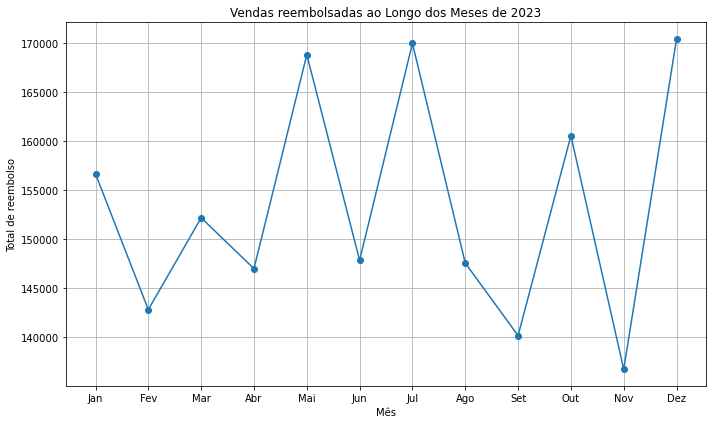

In [25]:
# Gerando um gráfico de linha para visualizar a variação das vendas reembolsadas ao longo dos meses

plt.figure(figsize = (10, 6))
plt.plot(vendas_por_mes_reembolsadas.index, vendas_por_mes_reembolsadas.values, marker='o', linestyle = '-')
plt.title('Vendas reembolsadas ao Longo dos Meses de 2023')
plt.xlabel('Mês')
plt.ylabel('Total de reembolso')
plt.grid(True)
plt.xticks(range(1, 13), ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'])
plt.tight_layout()
plt.show()

#### Segmentação de clientes

In [26]:
# Agrupando os dados pela coluna 'ID Cliente' e calculando o valor de compra de cada cliente considerando apenas as vendas concluídas

total_compras_por_cliente_concluidas = dados[dados['Status do Pedido'] == 'Concluído'].groupby('ID do Cliente')['Preço Total'].sum()

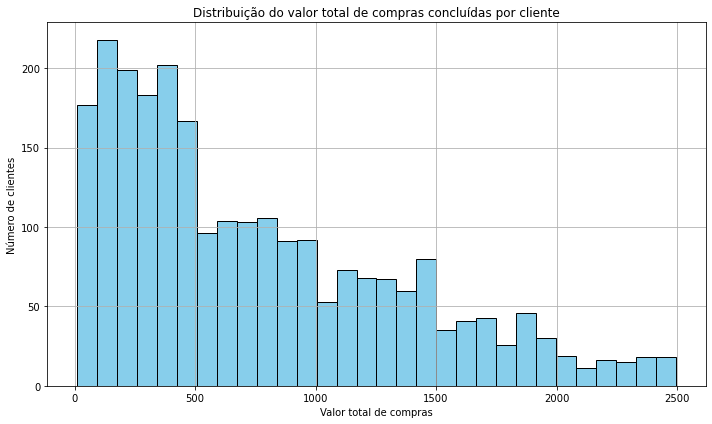

In [27]:
# Gerando gráfico para visualizar a distribuição das vendas concluídas por cliente

plt.figure(figsize = (10, 6))
total_compras_por_cliente_concluidas.plot(kind = 'hist', bins = 30, color = 'skyblue', edgecolor = 'black')
plt.title('Distribuição do valor total de compras concluídas por cliente')
plt.xlabel('Valor total de compras')
plt.ylabel('Número de clientes')
plt.grid(True)
plt.tight_layout()
plt.show()

#### Identificação da categoria com maior volume de vendas e maior receita

In [28]:
# Filtrando apenas as vendas concluídas

vendas_concluidas = dados[dados['Status do Pedido'] == 'Concluído']

In [29]:
# Analisando qual categoria teve o maior volume de vendas concluídas

categoria_mais_vendidas_concluidas = vendas_concluidas.groupby('Categoria do Produto')['Quantidade'].sum()

In [30]:
# Ordenando as categorias pelo total de quantidades vendidas

categoria_mais_vendidas_concluidas = categoria_mais_vendidas_concluidas.sort_values(ascending=False)
print('Categorias mais vendidas (concluídas)')
print(categoria_mais_vendidas_concluidas)

Categorias mais vendidas (concluídas)
Categoria do Produto
Esportes e Ar Livre    1283
Casa e Cozinha         1263
Eletrônicos            1262
Vestuário              1202
Livros                 1196
Beleza e Saúde         1098
Name: Quantidade, dtype: int64


In [31]:
# Analisando a categoria que gerou maior receita entre as vendas concluídas

vendas_por_categoria_concluidas = vendas_concluidas.groupby('Categoria do Produto')['Preço Total'].sum()

In [32]:
# Ordenando as categorias pelo total de vendas

vendas_por_categoria_concluidas = vendas_por_categoria_concluidas.sort_values(ascending=False)
print('Categorias com maior faturamento (concluídas):')
print(vendas_por_categoria_concluidas)

Categorias com maior faturamento (concluídas):
Categoria do Produto
Esportes e Ar Livre    330713.34
Eletrônicos            313782.64
Livros                 311885.25
Casa e Cozinha         311021.08
Vestuário              301340.74
Beleza e Saúde         277880.54
Name: Preço Total, dtype: float64


#### Análise de sazonalidade

In [33]:
# Extraindo o ano da coluna 'Data do Pedido' e criando uma cópia explícita do DataFrame

vendas_concluidas = vendas_concluidas.copy()
vendas_concluidas['Ano'] = vendas_concluidas['Data do Pedido'].dt.year

In [34]:
# Agrupando os dados por categoria do produto e mês, e calculando o total de vendas em cada categoria para cada mês

vendas_por_categoria_e_mes = vendas_concluidas.groupby(['Categoria do Produto', 'Mês'])['Preço Total'].sum().reset_index()

# Encontrando o mês em que cada categoria teve a maior receita

mes_maior_receita_por_categoria = vendas_por_categoria_e_mes.loc[vendas_por_categoria_e_mes.groupby('Categoria do Produto')['Preço Total'].idxmax()]

In [35]:
# Convertendo a coluna 'Data do Pedido' para datetime

dados['Data do Pedido'] = pd.to_datetime(dados['Data do Pedido'])

# Extraindo o mês e o ano da coluna 'Data do Pedido'

dados['Mês'] = dados['Data do Pedido'].dt.month.map(meses)
dados['Ano'] = dados['Data do Pedido'].dt.year

In [36]:
# Filtrando as vendas de 2023

vendas_2023 = vendas_concluidas[vendas_concluidas['Ano'] == 2023]

# Convertendo a coluna 'Data do Pedido' para datetime se ainda não estiver convertida

vendas_concluidas = vendas_concluidas.copy()
vendas_concluidas['Data do Pedido'] = pd.to_datetime(vendas_concluidas['Data do Pedido'])

In [37]:
# Criando uma coluna 'Mês' para as vendas concluídas

vendas_concluidas['Mês'] = vendas_concluidas['Data do Pedido'].dt.month

In [38]:
# Agrupando os dados por categoria do produto e mês, e calcular o total de vendas em cada categoria para cada mês

vendas_por_categoria_e_mes = vendas_concluidas.groupby(['Categoria do Produto', 'Mês'])['Preço Total'].sum().reset_index()

# Encontrando o mês em que cada categoria teve a maior receita

mes_maior_receita_por_categoria = vendas_por_categoria_e_mes.loc[vendas_por_categoria_e_mes.groupby('Categoria do Produto')['Preço Total'].idxmax()]

In [39]:
# Verificando as melhores vendas por categoria e mês

mes_maior_receita_por_categoria['Mês'] = mes_maior_receita_por_categoria['Mês'].apply(lambda x: meses.get(x, 'Desconhecido'))
print("Mês com maior receita para cada categoria (apenas vendas concluídas)")
print(mes_maior_receita_por_categoria)

Mês com maior receita para cada categoria (apenas vendas concluídas)
   Categoria do Produto      Mês  Preço Total
9        Beleza e Saúde  Outubro     33465.23
12       Casa e Cozinha  Janeiro     36523.88
31          Eletrônicos   Agosto     36180.19
45  Esportes e Ar Livre  Outubro     33815.84
57               Livros  Outubro     34454.89
66            Vestuário    Julho     32062.11


#### Calculando o prejuízo nas vendas (vendas canceladas e reembolsadas)

In [40]:
# Filtrando as vendas canceladas, pendentes e reembolsadas

vendas_canceladas = dados[dados['Status do Pedido'] == 'Cancelado']
vendas_pendentes = dados[dados['Status do Pedido'] == 'Pendente']
vendas_reembolsadas = dados[dados['Status do Pedido'] == 'Reembolsado']

In [41]:
# Calculando o prejuízo total de vendas somando os valores das vendas canceladas, pendentes e reembolsadas

prejuizo_total = vendas_canceladas['Preço Total'].sum() + vendas_pendentes['Preço Total'].sum() + vendas_reembolsadas['Preço Total'].sum()
print("Prejuízo total de vendas (canceladas e reembolsadas): ", prejuizo_total)

Prejuízo total de vendas (canceladas e reembolsadas):  5780618.3


In [42]:
print("Quantidade de linhas e colunas:")
print(dados.shape)

Quantidade de linhas e colunas:
(10000, 13)


In [43]:
# Criando o DataFrame unificado

analise_unificada = pd.concat([vendas_canceladas, vendas_concluidas, vendas_pendentes, vendas_reembolsadas])

# Criando uma pasta para salvar o arquivo, se não existir

pasta_destino = 'D:/Profissão_Analista_de_Dados/Vendas_Varejo_Eletronico/'
if not os.path.exists(pasta_destino):
    os.makedirs(pasta_destino)

# Definindo o caminho completo para o arquivo Excel
caminho_arquivo_excel = os.path.join(pasta_destino, 'Vendas_de_Varejo_Eletronico.xlsx')

# Salvando a análise em um arquivo Excel

with pd.ExcelWriter(caminho_arquivo_excel) as writer:
    analise_unificada.to_excel(writer, sheet_name='Analise_Unificada', index=False)
    vendas_canceladas.to_excel(writer, sheet_name='Vendas_Canceladas', index=False)
    vendas_concluidas.to_excel(writer, sheet_name='Vendas_Concluídas', index=False)
    vendas_pendentes.to_excel(writer, sheet_name='Vendas_Pendentes', index=False)
    vendas_reembolsadas.to_excel(writer, sheet_name='Vendas_Reembolsadas', index=False)